# Santander Customer Transaction Prediction

## Introduction

### Challenge description by the holder: 

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

More information can be found in the [Santander Customer Transaction Prediction](https://www.kaggle.com/c/santander-customer-transaction-prediction/) on Kaggle.

## Implementation

In [8]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, auc, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
# from skopt import BayesSearchCV
# import sweetviz as sv
# import warnings
# warnings.filterwarnings('ignore')

### Fetch the data:

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Preview the data

In [4]:
train_data.shape, test_data.shape

((200000, 202), (200000, 201))

In [4]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [94]:
train_data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.097500,10.706520,-1.618377,10.627213,6.843388,11.054107,-5.114619,5.383180,16.644544,0.363369,...,3.384315,7.266215,1.918934,3.286659,18.049874,-0.141655,2.112861,8.913195,15.914945,-3.309479
std,0.296712,3.005849,4.137456,2.597002,2.034015,1.641553,8.015311,0.867888,3.404841,3.322195,...,4.633652,2.997005,1.486114,3.948887,3.198350,1.437912,5.377005,0.937357,2.924217,10.495233
min,0.000000,2.825300,-13.202600,3.678500,1.154100,6.394000,-29.013300,2.897800,8.017000,-7.994200,...,-11.593900,-1.215800,-2.557100,-8.922900,10.791200,-4.488300,-12.325500,6.343300,7.459100,-34.420900
25%,0.000000,8.523225,-4.770550,8.613675,5.286475,9.806875,-11.388125,4.737500,14.063975,-2.285500,...,0.035400,5.021500,0.883200,0.584000,15.576000,-1.189300,-2.197525,8.235125,14.014600,-11.488175
50%,0.000000,10.550900,-1.556500,10.518700,6.865350,11.064100,-5.115700,5.363800,16.616600,0.486800,...,3.464800,7.116050,1.944550,3.344500,18.056700,-0.172500,2.413400,8.899800,15.945400,-2.886600
75%,0.000000,12.720400,1.315100,12.424250,8.379400,12.262225,1.127850,6.003375,19.163750,2.988225,...,6.484325,9.324725,2.954125,6.086125,20.530825,0.845975,6.067700,9.606425,18.077275,4.898825
max,1.000000,19.289300,8.416000,18.347700,12.674000,15.110800,17.251600,7.875500,26.284800,8.482900,...,16.211600,15.686300,6.408000,15.600400,26.097500,3.503500,14.843600,11.701200,24.447900,25.094400


In [95]:
test_data.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,10.660195,-1.678150,10.657813,6.790664,11.081248,-5.008449,5.387836,16.466028,0.268231,7.572179,...,3.153613,7.474078,1.975102,3.223534,18.059520,-0.150651,2.340825,8.939676,15.847162,-3.342769
std,3.044544,4.135478,2.596784,2.068614,1.608655,7.891081,0.857044,3.302831,3.331403,1.223863,...,4.597458,2.987728,1.499769,3.971737,3.211664,1.438973,5.336367,0.921057,2.959063,10.424328
min,2.194500,-11.556900,2.516400,1.241400,6.579700,-25.537100,2.873300,6.652900,-8.624900,4.414900,...,-10.045400,-0.393900,-3.340900,-9.083800,9.472600,-4.136100,-10.968700,6.218200,7.735000,-33.199000
25%,8.398725,-4.860800,8.731575,5.207275,9.890075,-11.113325,4.755900,13.864275,-2.260425,6.668725,...,-0.316400,5.191375,0.955575,0.539900,15.638175,-1.130900,-1.750575,8.278150,13.882050,-11.048400
50%,10.489750,-1.550500,10.504650,6.840000,11.059950,-4.927750,5.348000,16.446000,0.314800,7.651600,...,3.102450,7.374000,1.965300,3.298900,17.969400,-0.211200,2.521350,8.935350,15.945350,-2.857700
75%,12.744550,1.271025,12.419125,8.379900,12.237100,0.884000,5.953450,18.983400,2.872475,8.590475,...,6.385975,9.498200,2.995625,6.079150,20.527350,0.811000,6.440375,9.614725,17.950025,4.930500
max,20.064900,8.487900,17.923800,12.700400,15.432900,14.761300,7.955700,25.519000,8.273400,10.572200,...,16.099700,15.847800,7.065600,16.170900,26.962100,3.515100,15.041800,11.297100,24.090000,21.516600


There are 200 features named with var_0 to var_199 and 20000 rows of data. All the features are numerical and all the types are float64.

### Check the missing values

In [5]:
train_data.isnull().sum().any(), test_data.isnull().sum().any()

(False, False)

There are no missiing values (blank, null or empty). So we don't need to drop NA values.

### Plot the target value in training set

<AxesSubplot:xlabel='target', ylabel='count'>

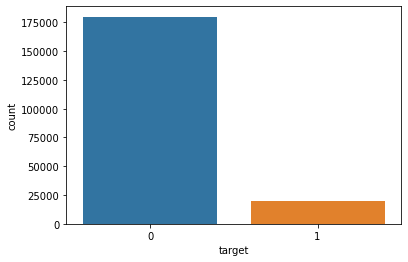

In [9]:
sns.countplot(x = train_data['target'])

In [ ]:
sum(train_data['target'])

We can see that the outcome is imbalance. Most target values are 0.

### Draw density plot for all features

In [5]:
train0 = train_data[train_data['target']==0]
train1 = train_data[train_data['target']==1]

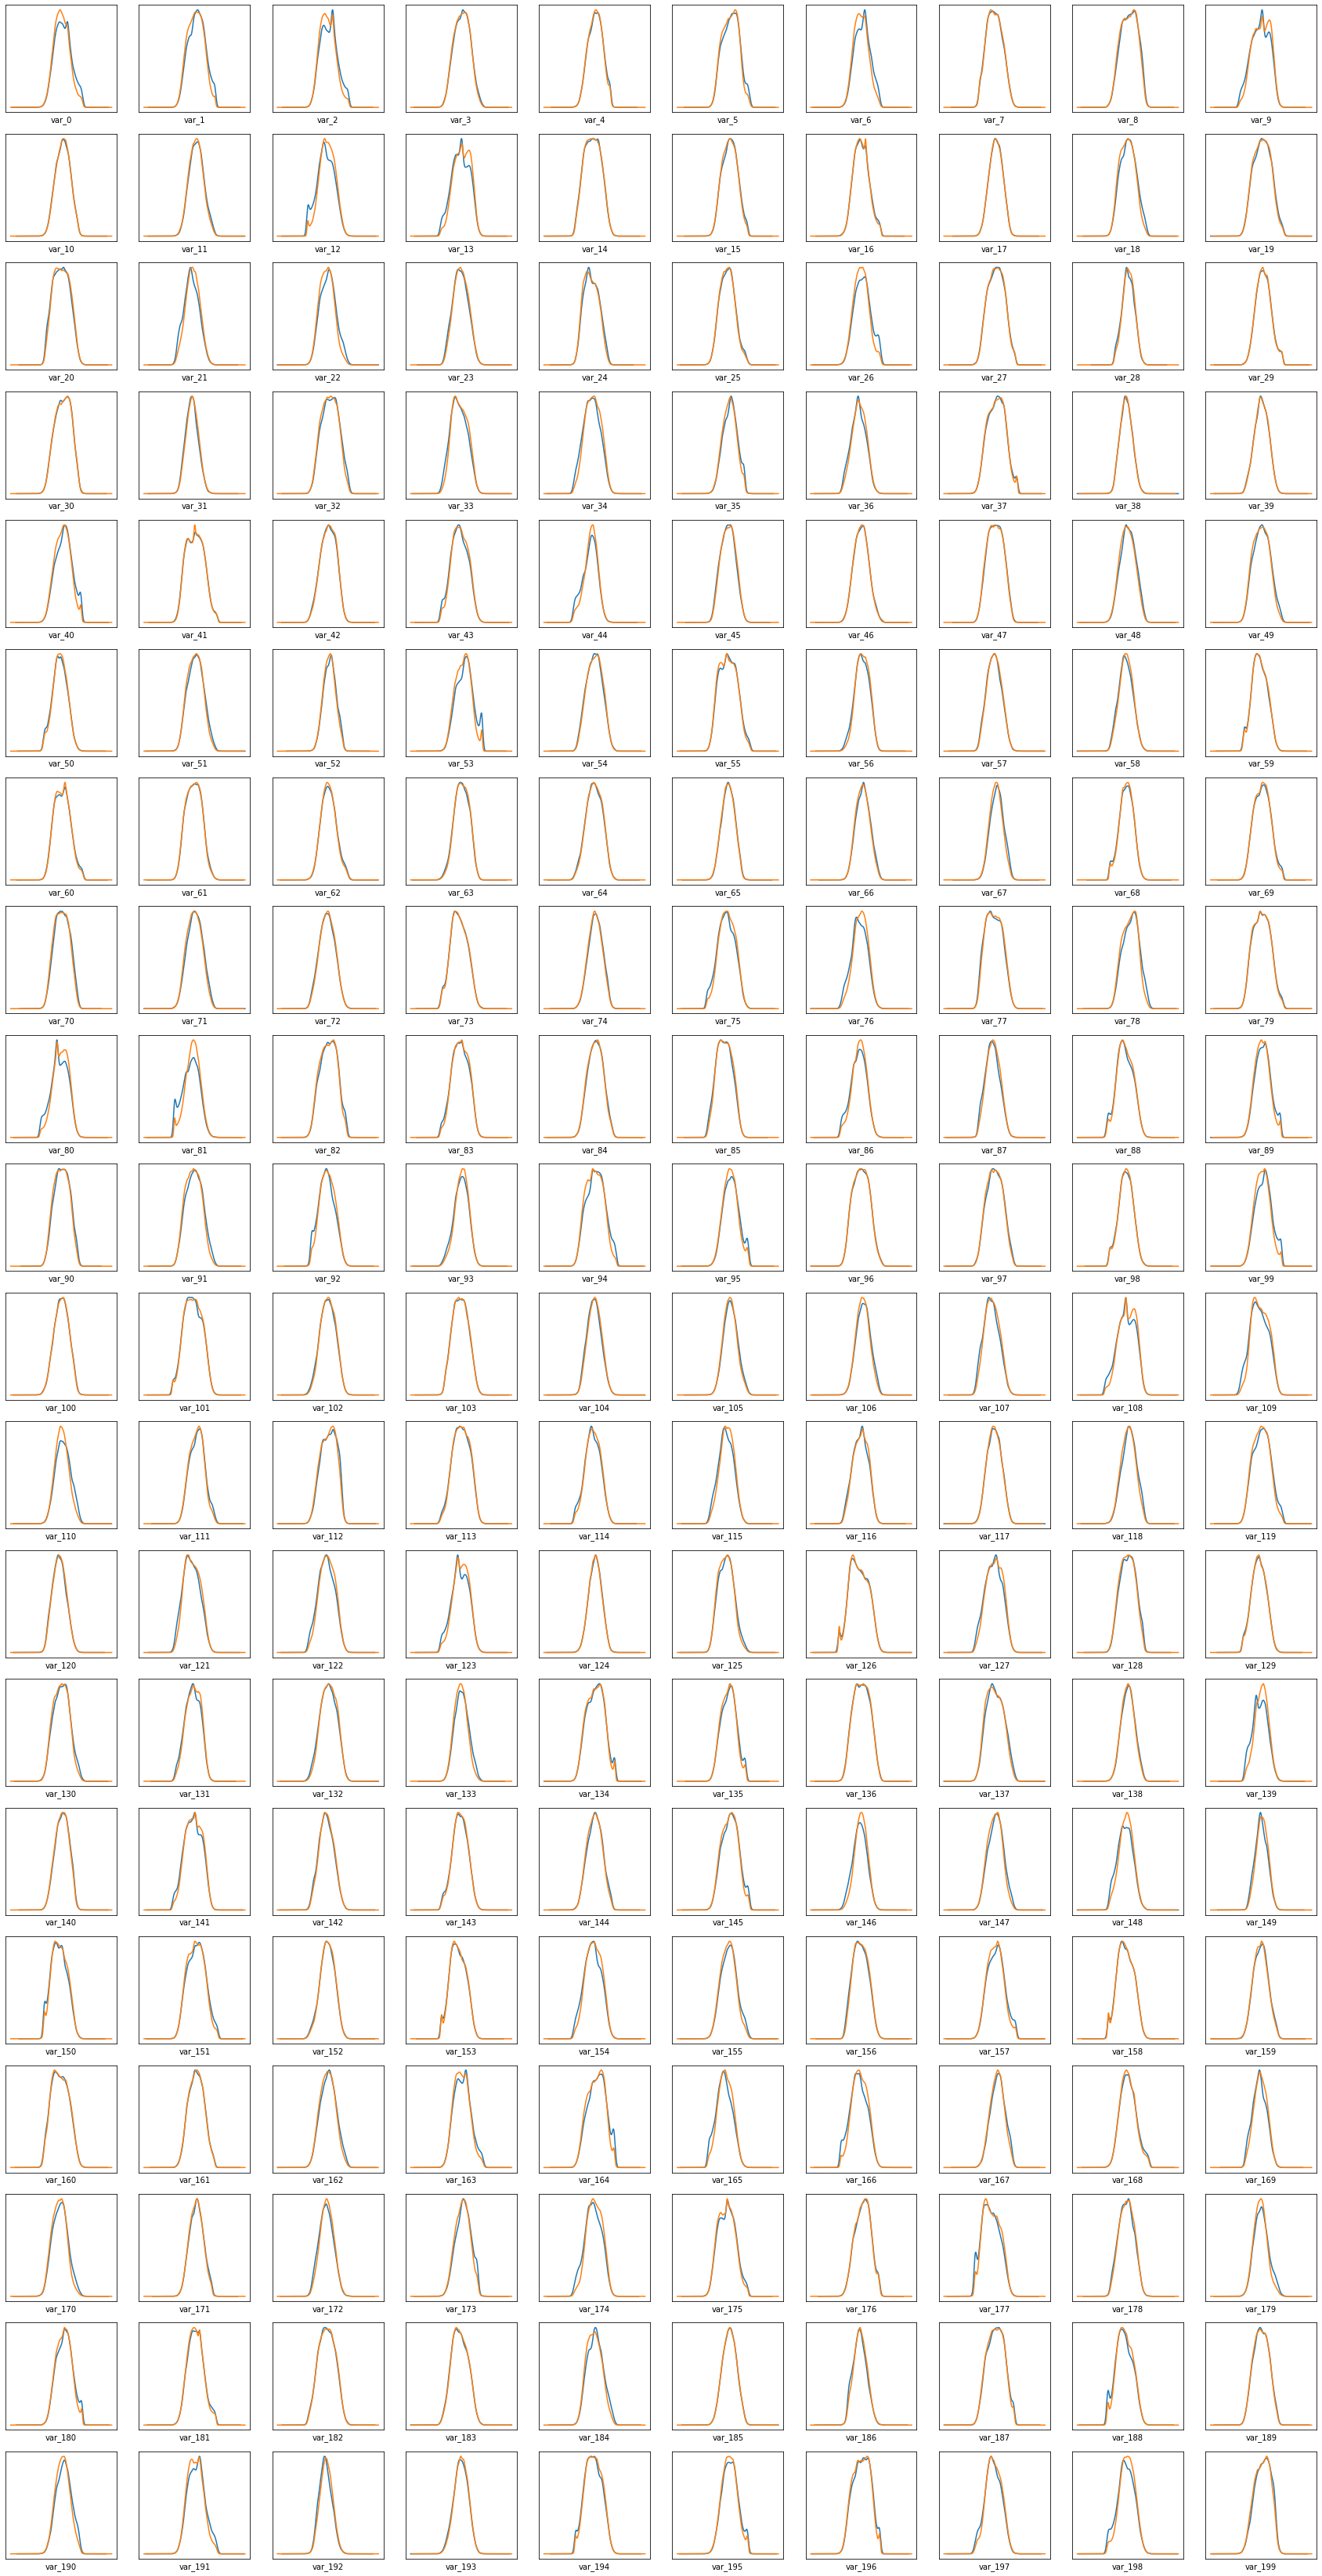

In [111]:
fig,axs = plt.subplots(20,10,figsize=(30,60))
counter = 0
for i in range(20):
    for j in range(10):
        axs[i,j].tick_params(left = False, labelleft = False, labelbottom=False, bottom = False)
        var = 'var_'+str(counter)
        train1.plot(kind='density',y=var,ax=axs[i,j],legend=False)
        train0.plot(kind='density',y=var,ax=axs[i,j],legend=False)
        axs[i,j].set_ylabel('')
        axs[i,j].set_xlabel(var)
        counter += 1   

### Find X_train, Y_train, X_test

In [130]:
X_train = train_data.drop(['ID_code','target'],axis = 1)
Y_train = train_data['target']
X_test = test_data.drop(['ID_code'],axis = 1)

### Draw feature correlation heatmap

            var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0    1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046  0.006983   
var_1   -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902  0.003258   
var_2    0.006573  0.003980  1.000000  0.001001  0.000723  0.001569  0.000883   
var_3    0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253 -0.000774   
var_4    0.001326  0.000303  0.000723 -0.000322  1.000000 -0.001368  0.000049   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274  0.001244   
var_196  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880  0.005378   
var_197 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535 -0.003565   
var_198 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953 -0.003025   
var_199  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767  0.006096   

            var_7     var_8

<AxesSubplot:>

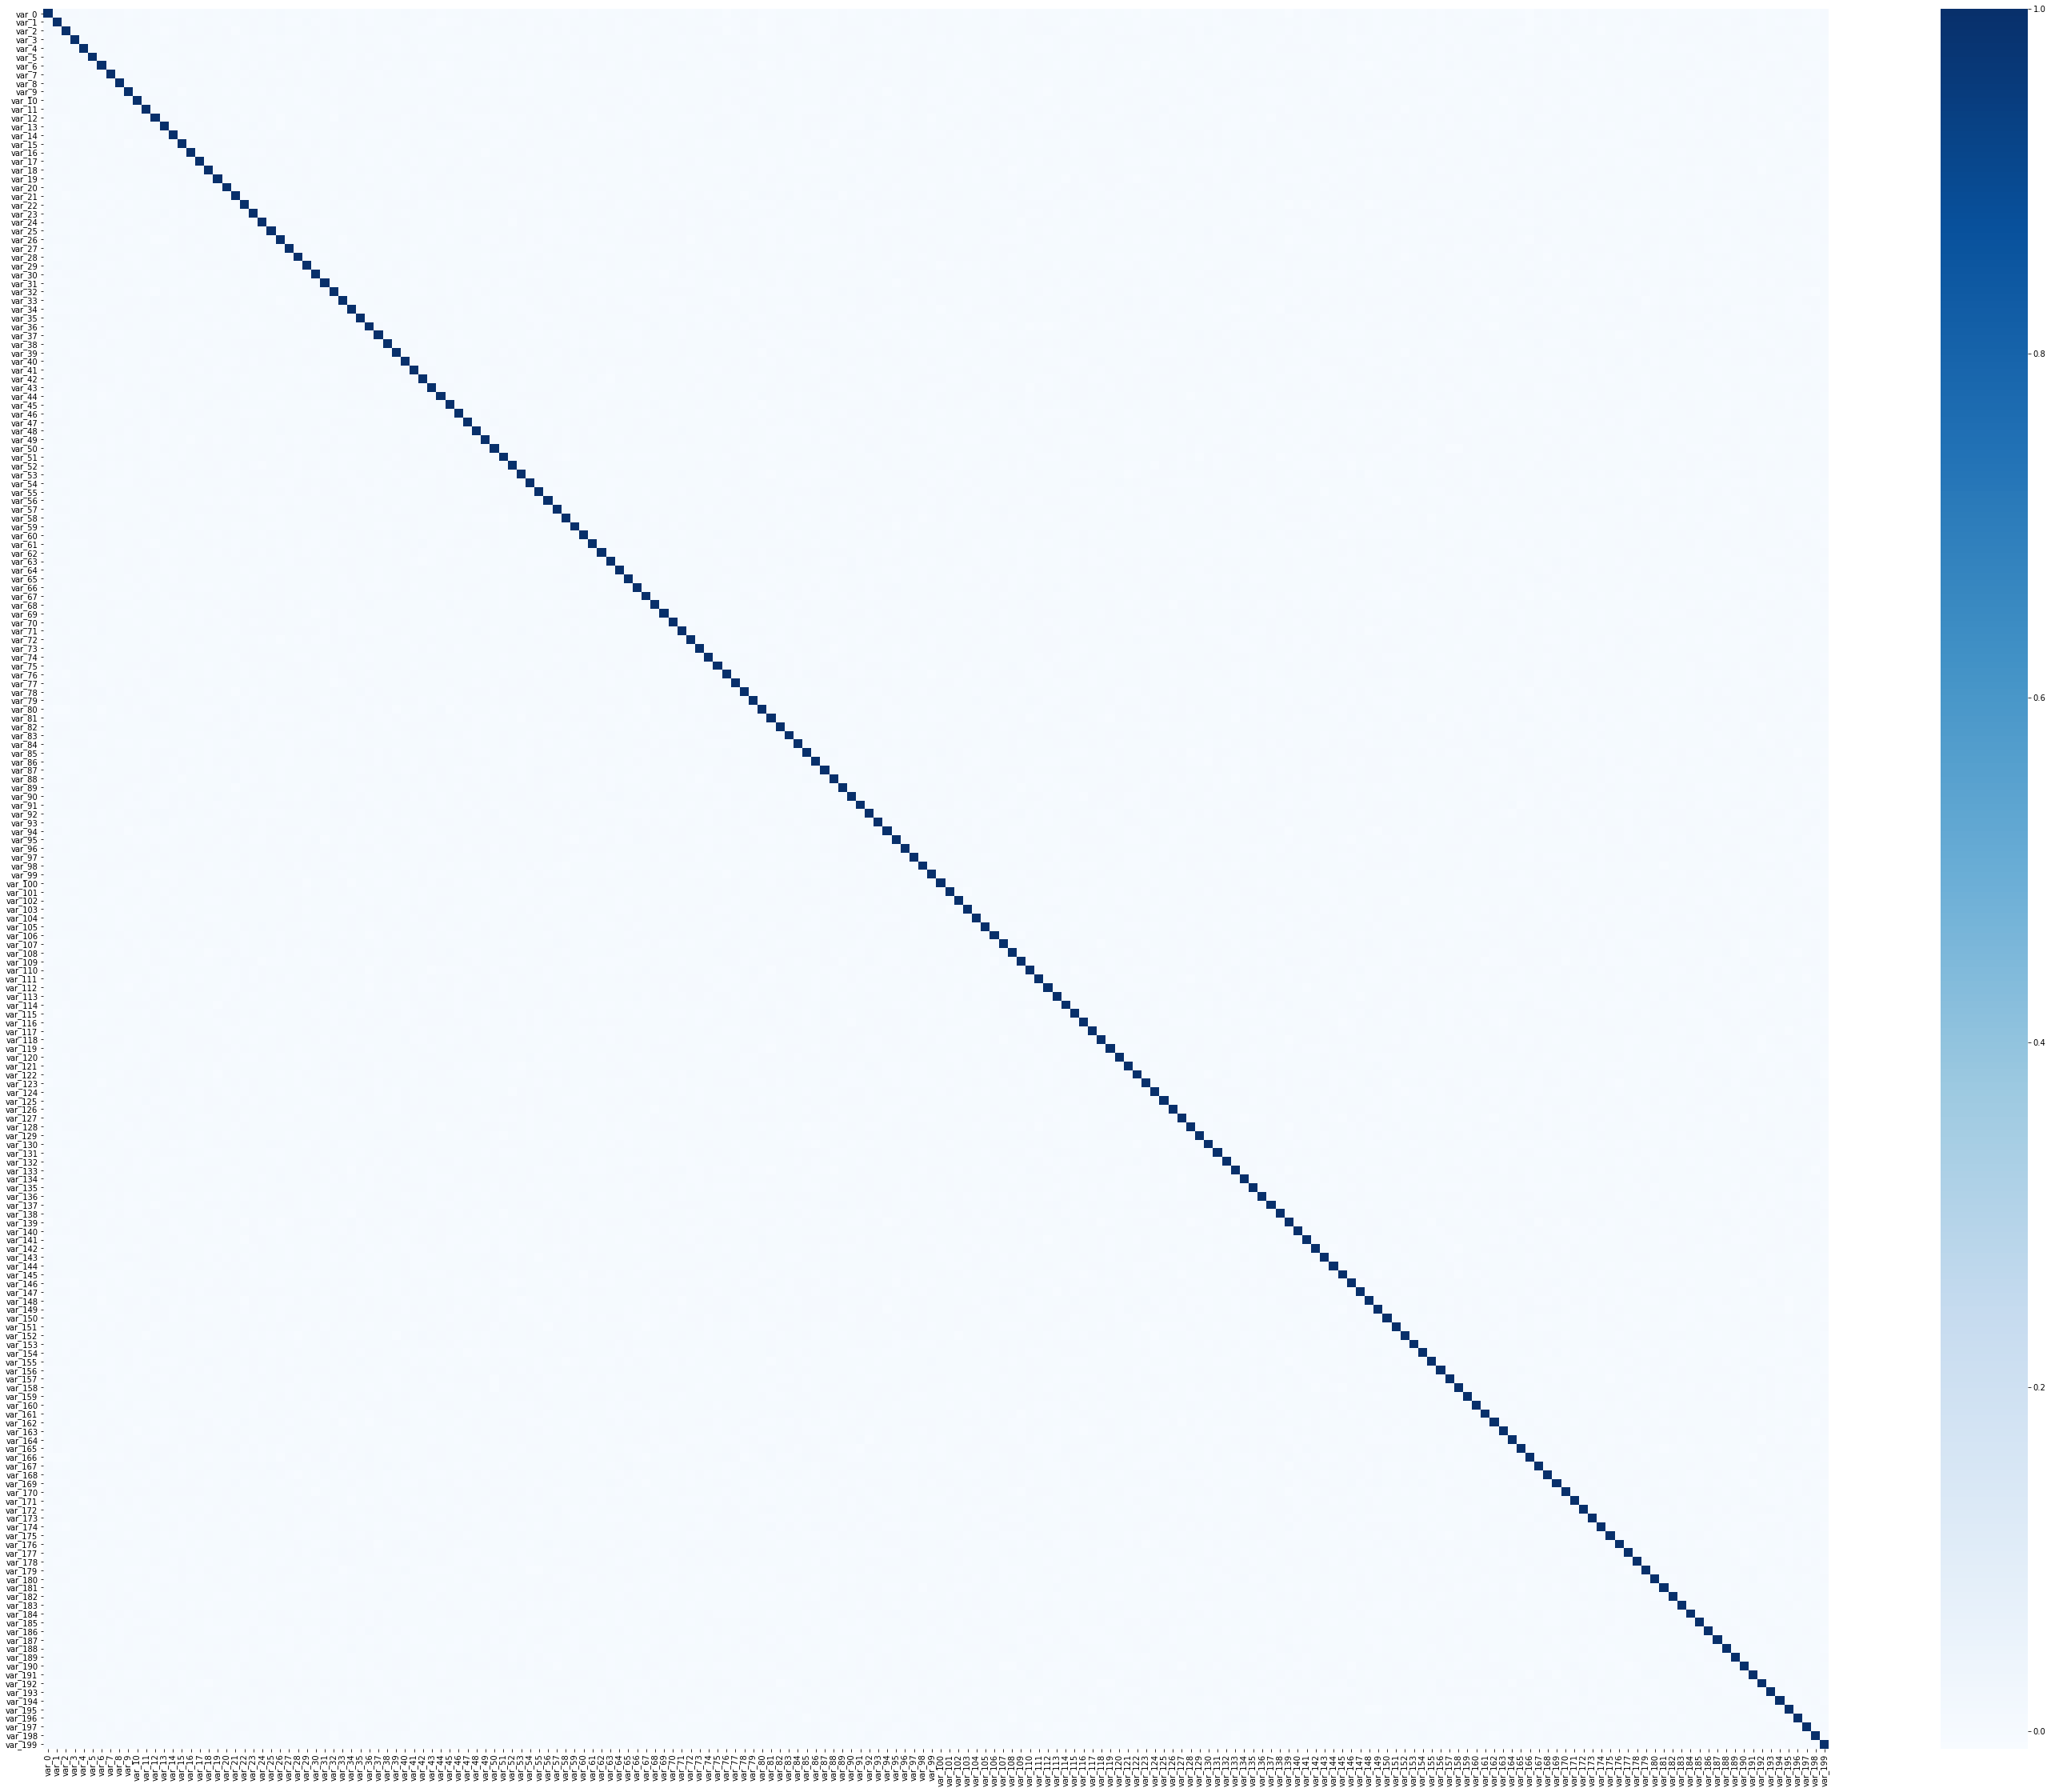

In [126]:
X_train_corr = X_train.corr()
print(X_train_corr)
fig2,axs2 = plt.subplots(1,1,figsize=(50,40))
sns.heatmap(X_train_corr,cmap="Blues",ax=axs2)

### Add  new features

In [133]:
# feature_mean = X_train.describe().loc['mean']
# for i in range(200):
#     X_train['var_'+str(i)+'_new'] = pd.DataFrame(np.square(np.array(X_train.loc[:,'var_'+str(i)])))

### Modelling

The model list we decide to choose:
* Decision Tree
* Logistic Regression
* Support Vector Machines
* Stochastic Gradient Descent
* Random Forest
* Naive Bayes classifier

Define a function for evaluation or hyperparameter tuning using K Fold Cross Validation:

In [213]:
def tuning(clf, param_name, param_list, X_train, Y_train, k):
    kf = KFold(n_splits=k)
    
    if not param_name: # evaluation
        # how many decimal places to round up
        dec_num = 3
        score, accs, precs, recs, f1s = [],[],[],[],[] # record metrics of K folds   
            
        for train,test in tqdm(kf.split(X_train, Y_train)):
            clf.fit(X_train.iloc[train], Y_train.iloc[train])
            Y_predict = clf.decision_function(X_train.iloc[test]) # used for SGD, LinearSVC
            score.append(roc_auc_score(Y_train.iloc[test], Y_predict))
#             Y_predict_proba = clf.predict_proba(X_train.iloc[test]) # used for others
#             score.append(roc_auc_score(Y_train.iloc[test], Y_predict_proba[:,1]))
            print(score)
            
            Y_predict = clf.predict(X_train.iloc[test])
            accs.append(accuracy_score(Y_train.iloc[test],Y_predict))
            prec, rec, f1, _ = precision_recall_fscore_support(Y_train.iloc[test], Y_predict,average='micro',warn_for=())
            precs.append(prec)
            recs.append(rec)
            f1s.append(f1)
        return {'roc_auc_score':sum(score)/k, 'accuracy':sum(accs)/k, 'precision':sum(precs)/k, 'recall':sum(recs)/k, 'f1':sum(f1s)/k}
    
    else: # hyperparameter tuning
        scores = []
        for param in param_list:
            score = [] # record scores of K folds
            clf.__dict__[param_name] = param
            for train,test in tqdm(kf.split(X_train, Y_train)):
                clf.fit(X_train.iloc[train], Y_train.iloc[train])
                Y_predict_proba = clf.predict_proba(X_train.iloc[test])
                score.append(roc_auc_score(Y_train.iloc[test], Y_predict_proba[:,1]))
            scores.append(score)
            print(score)
        return scores

Define a function for drawing the output table of K Fold Cross Validation:

In [27]:
def table_score(param_name, param_list, score_list, k):
    '''
        use example:
        result = table_score('C', [0.005, 0.01, 0.05, 0.1, 0.5], res, 5)
        here res is the return score list from tuning function
        return a DataFrame
    '''
    plot_c = {}
    i = 0
    for param in param_list:
        plot_c[f'{param_name}={param}']=score_list[i]
        i += 1
    result = pd.DataFrame(plot_c)
    result = result.append(result.describe().loc['mean'])
    result = result.append(result.describe().loc['std'])
    for j in range(k):
        result = result.rename(index={j: f"score_{j}"})
    return result

In [211]:
X_train = train_data.drop(['ID_code','target'],axis = 1)
Y_train = train_data['target']
lim = 100000
X_train = X_train[0:lim]
Y_train = Y_train[0:lim]

#### Decision Tree

In [29]:
DT_model = DecisionTreeClassifier(random_state=0)
tuning(DT_model, None, None, X_train, Y_train, 5)

5it [24:07, 289.50s/it]


0.557388566677161

#### Logistic Regression

In [125]:
logistic_model = LogisticRegression(penalty='l2',C=0.01,class_weight='balanced', solver='lbfgs', max_iter=5000)
tuning(logistic_model,None, None, X_train, Y_train, 5)

5it [05:30, 66.10s/it]


{'roc_auc_score': 0.8543984877026499,
 'accuracy': 0.77746,
 'precision': 0.77746,
 'recall': 0.77746,
 'f1': 0.77746}

In [124]:
# tuning
logistic_model = LogisticRegression(penalty='l2',class_weight='balanced', solver='lbfgs', max_iter=5000)
scores = tuning(logistic_model,'C',[0.0001,0.001,0.01,0.1,1,10,100,1000], X_train, Y_train, 5)

5it [00:59, 11.94s/it]
0it [00:00, ?it/s]

[0.8403895276960202, 0.841247786483253, 0.8408431799015871, 0.8404002028245192, 0.8408176891146383]


5it [02:40, 32.03s/it]
0it [00:00, ?it/s]

[0.8503631022265747, 0.8514806772777141, 0.8521868446687396, 0.8497725199605083, 0.8515182015749385]


5it [05:26, 65.30s/it]
0it [00:00, ?it/s]

[0.8538149038114715, 0.8543725775306179, 0.8567204419673644, 0.851879426725618, 0.8552050884781781]


5it [04:47, 57.59s/it]
0it [00:00, ?it/s]

[0.8533161010957936, 0.854040305763127, 0.856770486941993, 0.8517235523265796, 0.8546790672665209]


5it [03:13, 38.60s/it]
0it [00:00, ?it/s]

[0.8536947188737637, 0.8541776230175209, 0.8572916515763509, 0.8511593728537088, 0.8552402599768878]


5it [03:50, 46.12s/it]
0it [00:00, ?it/s]

[0.8537275759985861, 0.8541072493304307, 0.8573419983572956, 0.851134529532967, 0.855217921703449]


5it [04:03, 48.78s/it]
0it [00:00, ?it/s]

[0.8537064696636872, 0.8541190579395309, 0.8573540157360716, 0.851090342762706, 0.8552409933040461]


5it [03:38, 43.62s/it]

[0.8536973113741785, 0.8540446637021997, 0.8573400503347087, 0.8511070301768544, 0.8552433343099747]


In [126]:
res = table_score('C', [0.0001,0.001,0.01,0.1,1,10,100,1000], scores, 5)
res

,C=0.0001,C=0.001,C=0.01,C=0.1,C=1,C=10,C=100,C=1000
score_0,0.840390,0.850363,0.853815,0.853316,0.853695,0.853728,0.853706,0.853697
score_1,0.841248,0.851481,0.854373,0.854040,0.854178,0.854107,0.854119,0.854045
score_2,0.840843,0.852187,0.856720,0.856770,0.857292,0.857342,0.857354,0.857340
score_3,0.840400,0.849773,0.851879,0.851724,0.851159,0.851135,0.851090,0.851107
score_4,0.840818,0.851518,0.855205,0.854679,0.855240,0.855218,0.855241,0.855243
mean,0.840740,0.851064,0.854398,0.854106,0.854313,0.854306,0.854302,0.854286
std,0.000320,0.000872,0.001596,0.001657,0.002004,0.002024,0.002044,0.002037


#### SVM

In [6]:
SVM_model = SVC(gamma='scale',probability=True)
tuning(SVM_model, None, None, X_train, Y_train, 2)

2it [17:07, 513.81s/it]


0.8194039512542012

In [57]:
LinearSVM_model = LinearSVC()
tuning(LinearSVM_model, None, None, X_train, Y_train, 5)

0it [00:00, ?it/s]E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
1it [00:32, 32.38s/it]E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
2it [01:04, 32.33s/it]E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
3it [01:36, 32.14s/it]E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
4it [02:09, 32.36s/it]E:\ANACONDA\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to co

(0.7919891642926179,)

#### SGD

In [214]:
SGD_model = SGDClassifier(class_weight='balanced',learning_rate='adaptive',eta0=0.01,alpha=0.01)
tuning(SGD_model, None, None, X_train, Y_train, 5)

1it [00:03,  3.30s/it]

[0.8498284553747266]


2it [00:06,  3.28s/it]

[0.8498284553747266, 0.8516869062009285]


3it [00:09,  3.11s/it]

[0.8498284553747266, 0.8516869062009285, 0.8526993941046142]


4it [00:12,  3.27s/it]

[0.8498284553747266, 0.8516869062009285, 0.8526993941046142, 0.8505365996308378]


5it [00:15,  3.16s/it]

[0.8498284553747266, 0.8516869062009285, 0.8526993941046142, 0.8505365996308378, 0.8512956649872723]


{'roc_auc_score': 0.8512094040596759,
 'accuracy': 0.76371,
 'precision': 0.76371,
 'recall': 0.76371,
 'f1': 0.76371}

#### Random Forest

In [101]:
random_forest_model = RandomForestClassifier(n_estimators=10000,random_state=0,max_depth=20,min_samples_leaf=50,max_features=1)
tuning(random_forest_model, None, None, X_train, Y_train, 5)

5it [1:39:42, 1196.41s/it]


{'roc_auc_score': 0.8929845380450153,
 'accuracy': 0.89985,
 'precision': 0.89985,
 'recall': 0.89985,
 'f1': 0.89985}

In [98]:
# tuning max_depth
random_forest_model = RandomForestClassifier(n_estimators=10000,random_state=0,min_samples_leaf=50,max_features=1)
scores = tuning(random_forest_model, 'max_depth', [5,10,15,20,30,50,100,None], X_train, Y_train, 5)

5it [00:50, 10.12s/it]
0it [00:00, ?it/s]

[0.8713074634404274, 0.882845597421994, 0.8713908904761405, 0.8611061657438259, 0.8746448054663716]


5it [01:14, 14.92s/it]
0it [00:00, ?it/s]

[0.8755612377773042, 0.8888496507808383, 0.879961156622729, 0.8686610190405479, 0.881482097391845]


5it [01:21, 16.28s/it]
0it [00:00, ?it/s]

[0.8777836178390195, 0.8889767075116686, 0.8824216832193871, 0.8685091053635435, 0.8807207841001434]


5it [01:24, 16.97s/it]
0it [00:00, ?it/s]

[0.8776964904388727, 0.8891411338692137, 0.8841742867165016, 0.8671421824951611, 0.8816833214896518]


5it [01:24, 16.86s/it]
0it [00:00, ?it/s]

[0.8779193598030163, 0.8885865063260551, 0.8836734518323961, 0.8670392054374287, 0.8819995307862052]


5it [01:24, 16.95s/it]
0it [00:00, ?it/s]

[0.8779193598030163, 0.8885865063260551, 0.8836734518323961, 0.8670392054374287, 0.8819995307862052]


5it [01:24, 16.85s/it]
0it [00:00, ?it/s]

[0.8779193598030163, 0.8885865063260551, 0.8836734518323961, 0.8670392054374287, 0.8819995307862052]


5it [01:25, 17.04s/it]

[0.8779193598030163, 0.8885865063260551, 0.8836734518323961, 0.8670392054374287, 0.8819995307862052]


In [99]:
res = table_score('max_depth', [5,10,15,20,30,50,100,None], scores, 5)
res

,max_depth=5,max_depth=10,max_depth=15,max_depth=20,max_depth=30,max_depth=50,max_depth=100,max_depth=None
score_0,0.871307,0.875561,0.877784,0.877696,0.877919,0.877919,0.877919,0.877919
score_1,0.882846,0.888850,0.888977,0.889141,0.888587,0.888587,0.888587,0.888587
score_2,0.871391,0.879961,0.882422,0.884174,0.883673,0.883673,0.883673,0.883673
score_3,0.861106,0.868661,0.868509,0.867142,0.867039,0.867039,0.867039,0.867039
score_4,0.874645,0.881482,0.880721,0.881683,0.882000,0.882000,0.882000,0.882000
mean,0.872259,0.878903,0.879682,0.879967,0.879844,0.879844,0.879844,0.879844
std,0.006983,0.006675,0.006685,0.007409,0.007258,0.007258,0.007258,0.007258


In [82]:
# tuning min_sample_leaf
random_forest_model = RandomForestClassifier(n_estimators=10000,random_state=0,max_features=1)
tuning(random_forest_model, 'min_samples_leaf', [20,50,100,200,300,500,1000], X_train, Y_train, 5)

5it [1:23:37, 1003.51s/it]
5it [1:00:45, 729.04s/it]
5it [4:57:11, 3566.29s/it]
5it [27:38, 331.65s/it]
5it [24:57, 299.40s/it]
5it [21:40, 260.12s/it]
5it [16:57, 203.53s/it]


[[0.889586463931267,
  0.8961174676305866,
  0.8883795075340337,
  0.8945193562168998,
  0.880591997710961],
 [0.8905079376994814,
  0.8955884233137126,
  0.8897741555103655,
  0.8966834216962818,
  0.883000020469124],
 [0.8897788239541625,
  0.8961815080413371,
  0.8885760005366321,
  0.897268251560569,
  0.8819453680178805],
 [0.8894662668437897,
  0.8956282352919764,
  0.8873949463014743,
  0.8964538022830043,
  0.881834484475264],
 [0.8886234350361552,
  0.8944477532621934,
  0.8875153134355759,
  0.895639811785486,
  0.8810678227452684],
 [0.8878099822564076,
  0.8943646031018765,
  0.8872191948398577,
  0.8956963564262181,
  0.8801502149093814],
 [0.8831399456029984,
  0.8919823680710665,
  0.8837578950248545,
  0.8910763266628627,
  0.877045475716121]]

In [97]:
scores = [[0.889586463931267,
  0.8961174676305866,
  0.8883795075340337,
  0.8945193562168998,
  0.880591997710961],
 [0.8905079376994814,
  0.8955884233137126,
  0.8897741555103655,
  0.8966834216962818,
  0.883000020469124],
 [0.8897788239541625,
  0.8961815080413371,
  0.8885760005366321,
  0.897268251560569,
  0.8819453680178805],
 [0.8894662668437897,
  0.8956282352919764,
  0.8873949463014743,
  0.8964538022830043,
  0.881834484475264],
 [0.8886234350361552,
  0.8944477532621934,
  0.8875153134355759,
  0.895639811785486,
  0.8810678227452684],
 [0.8878099822564076,
  0.8943646031018765,
  0.8872191948398577,
  0.8956963564262181,
  0.8801502149093814],
 [0.8831399456029984,
  0.8919823680710665,
  0.8837578950248545,
  0.8910763266628627,
  0.877045475716121]]

In [86]:
res = table_score('min_samples_leaf', [20,50,100,200,300,500,1000], scores, 5)
res

,min_samples_leaf=20,min_samples_leaf=50,min_samples_leaf=100,min_samples_leaf=200,min_samples_leaf=300,min_samples_leaf=500,min_samples_leaf=1000
score_0,0.889586,0.890508,0.889779,0.889466,0.888623,0.887810,0.883140
score_1,0.896117,0.895588,0.896182,0.895628,0.894448,0.894365,0.891982
score_2,0.888380,0.889774,0.888576,0.887395,0.887515,0.887219,0.883758
score_3,0.894519,0.896683,0.897268,0.896454,0.895640,0.895696,0.891076
score_4,0.880592,0.883000,0.881945,0.881834,0.881068,0.880150,0.877045
mean,0.889839,0.891111,0.890750,0.890156,0.889459,0.889048,0.885400
std,0.005459,0.004879,0.005571,0.005421,0.005253,0.005595,0.005534


In [187]:
feature_importance = random_forest_model.feature_importances_
dic = {}
i = 0
for i in range(0,200):
    dic[f'var_{i}']=feature_importance[i]
dic_sorted = sorted(dic.values(), reverse=True)[:10]
var_sorted = sorted(dic, key=dic.get, reverse=True)[:10]

{'var_0': 0.006633803905408577,
 'var_1': 0.006775994007950113,
 'var_2': 0.007078896665510021,
 'var_3': 0.003871501904485278,
 'var_4': 0.0038628144068256717,
 'var_5': 0.0051919382526953535,
 'var_6': 0.008451053621786454,
 'var_7': 0.003491538109159815,
 'var_8': 0.004059686825546001,
 'var_9': 0.006000638966862994,
 'var_10': 0.003484393027198032,
 'var_11': 0.004297851934838769,
 'var_12': 0.010919109857035116,
 'var_13': 0.006563099214113199,
 'var_14': 0.0035667014843903232,
 'var_15': 0.0039994700861687325,
 'var_16': 0.0035841516991761383,
 'var_17': 0.003445916619241449,
 'var_18': 0.0061596884246055165,
 'var_19': 0.003764821713617577,
 'var_20': 0.0040571330979521,
 'var_21': 0.007838573342867798,
 'var_22': 0.008048481612455057,
 'var_23': 0.004151362625877396,
 'var_24': 0.0046674490430397885,
 'var_25': 0.0036568078867540146,
 'var_26': 0.0090073292060373,
 'var_27': 0.003529454762575221,
 'var_28': 0.004189097582113113,
 'var_29': 0.0034309947254655476,
 'var_30': 0.00

<AxesSubplot:>

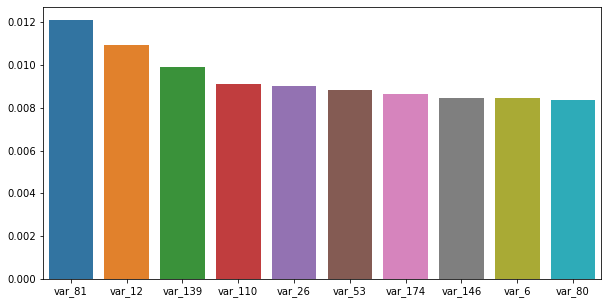

In [203]:
dic_sorted = sorted(dic.values(), reverse=True)[:10]
var_sorted = sorted(dic, key=dic.get, reverse=True)[:10]
plt.figure(figsize = (10,5))
sns.barplot(x=var_sorted,y=dic_sorted)

<AxesSubplot:>

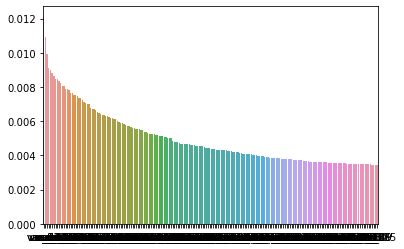

In [209]:
dic_sorted = sorted(dic.values(), reverse=True)
var_sorted = sorted(dic, key=dic.get, reverse=True)
sns.barplot(x=var_sorted,y=dic_sorted)

#### Naive Bayes

In [46]:
# tuning
naive_bayes_model = GaussianNB()
scores = tuning(naive_bayes_model, 'var_smoothing', [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5], X_train, Y_train, 5)

5it [00:05,  1.16s/it]
5it [00:05,  1.15s/it]
5it [00:05,  1.14s/it]
5it [00:05,  1.16s/it]
5it [00:05,  1.17s/it]
5it [00:05,  1.17s/it]


In [66]:
res = table_score('var_smoothing', [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5], scores, 5)
res

,var_smoothing=1e-10,var_smoothing=1e-09,var_smoothing=1e-08,var_smoothing=1e-07,var_smoothing=1e-06,var_smoothing=1e-05
score_0,0.886705,0.886703,0.886693,0.886625,0.886558,0.886457
score_1,0.884776,0.884774,0.884754,0.884638,0.884516,0.884336
score_2,0.888192,0.888194,0.888210,0.888255,0.888236,0.888006
score_3,0.889562,0.889562,0.889567,0.889556,0.889540,0.889547
score_4,0.892805,0.892805,0.892798,0.892751,0.892676,0.892420
mean,0.888408,0.888408,0.888404,0.888365,0.888305,0.888153
std,0.002713,0.002714,0.002718,0.002742,0.002759,0.002743


In [65]:
# final result
naive_bayes_model = GaussianNB()
tuning(naive_bayes_model, None, None, X_train, Y_train, 5)

5it [00:07,  1.43s/it]


{'roc_auc_score': 0.8884075007201743,
 'accuracy': 0.921515,
 'precision': 0.921515,
 'recall': 0.921515,
 'f1': 0.921515}

### Final Prediction

In [140]:
Y_pred1 = random_forest_model.predict_proba(X_test)
Y_pred2 = naive_bayes_model.predict_proba(X_test)

### Make submission

In [145]:
submission1 = pd.DataFrame({"ID_code": test_data["ID_code"],"target": Y_pred1[:,1]})
submission1.to_csv('submission1.csv', index=False)

submission2 = pd.DataFrame({"ID_code": test_data["ID_code"],"target": Y_pred2[:,1]})
submission2.to_csv('submission2.csv', index=False)